<a href="https://colab.research.google.com/github/masandhu13/heart-disease-prediction-classification/blob/master/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction
By Mannat Sandhu and Jinhao Xie


##Introduction



Using the dataset which has been downloaded from The UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/heart+disease).
The UCI Machine Learning Repository states that the creators of the dataset are:

    Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. 
    University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. 
    University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. 
    V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.  
    

***Note: Please run the next code block and upload the file "heart.csv" as provided alongside.***



In [0]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (2).csv


In [0]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))

In [0]:
df.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


This study attempts to predict the likelihood of having heart disease based on particular attributes. For the purpose of this project we are using the “Heart Disease” dataset sourced from UCI machine learning repository. Originally this dataset consists of 75 attributes, however for the purpose of our study we limit it to 14 attributes. These are:

    1. age: age in years
    2. sex: sex (1 = male; 0 = female) 
    3. cp: chest pain type 
        -- Value 1: typical angina 
        -- Value 2: atypical angina 
        -- Value 3: non-anginal pain 
        -- Value 4: asymptomatic 
    4. trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
    5. chol: serum cholesterol in mg/dl 
    6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    7. restecg: resting electrocardiographic results 
        -- Value 0: normal 
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    8. thalach: maximum heart rate achieved 
    9. exang: exercise induced angina (1 = yes; 0 = no) 
    10. oldpeak = ST depression induced by exercise relative to rest 
    11. slope: the slope of the peak exercise ST segment 
        -- Value 1: upsloping 
        -- Value 2: flat 
        -- Value 3: downsloping 
    12. ca: number of major vessels (0-3) colored by fluoroscopy 
    13. thal: 3 = normal; 6 = fixed defect; 7 = reversible defect 
    14. target: diagnosis of heart disease (angiographic disease status)  (the predicted attribute)
        -- Value 0: < 50% diameter narrowing 
        -- Value 1: > 50% diameter narrowing

In [0]:
print('Number of rows in the dataset: ',df.shape[0])
print('Number of columns in the dataset: ',df.shape[1])
df.isnull().sum()

Number of rows in the dataset:  303
Number of columns in the dataset:  14


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no null values in the data.

In [0]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##Explore Data

To begin, let us look at the distribution of the target variable (diagnosis of heart disease) that we want to predict.

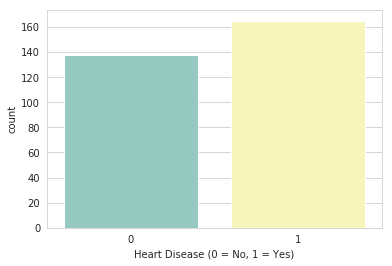

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

sns.countplot(x="target", data=df, palette="Set3")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.show()

As mentioned before, the target is the diagnosis of heart disease (angiographic disease status) which has 2 values:

1. Value 0: < 50% diameter narrowing
2. Value 1: > 50% diameter narrowing
    
In the plot above, and in the rest of the notebook, we simplify value 0 as "No" and value 1 as "Yes" for easy understanding.

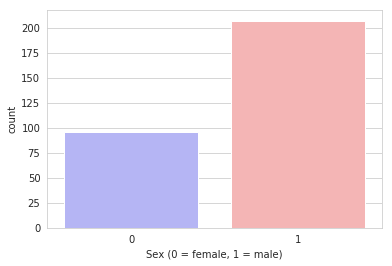

In [0]:
sns.countplot(x='sex', data=df, palette="bwr")
plt.xlabel("Sex (0 = female, 1 = male)")
plt.show()

In [0]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


We can take a look at a scatterplot of all the variables to visualize what ranges they lie in.

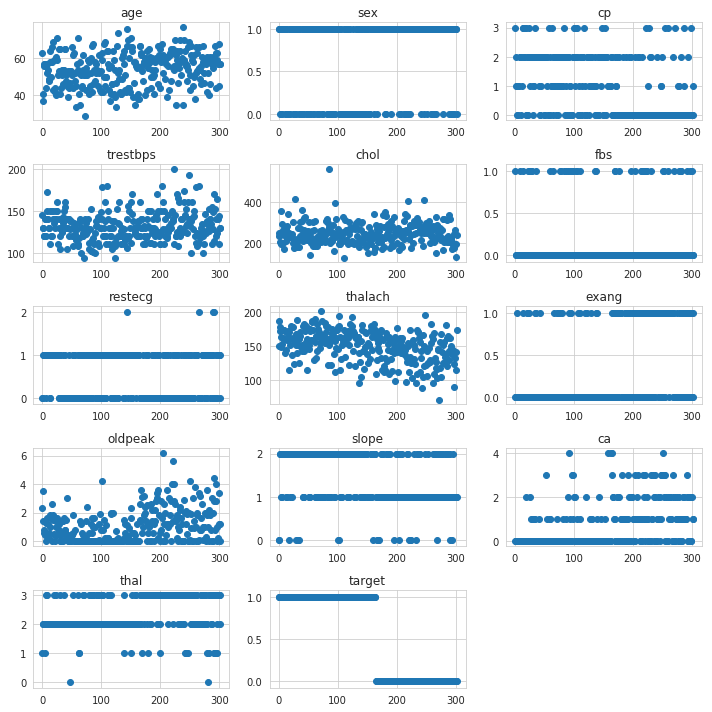

In [0]:
for i,col in enumerate(df.columns.values):
    plt.subplot(5,3,i+1)
    plt.scatter([i for i in range(303)],df[col].values.tolist())
    plt.title(col)
    fig,ax=plt.gcf(),plt.gca()
    fig.set_size_inches(10,10)
    plt.tight_layout()
plt.show()

Now let us take a look at the correlation between the variables.

In [0]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


It is easier to understand the above table as a heatmap - 

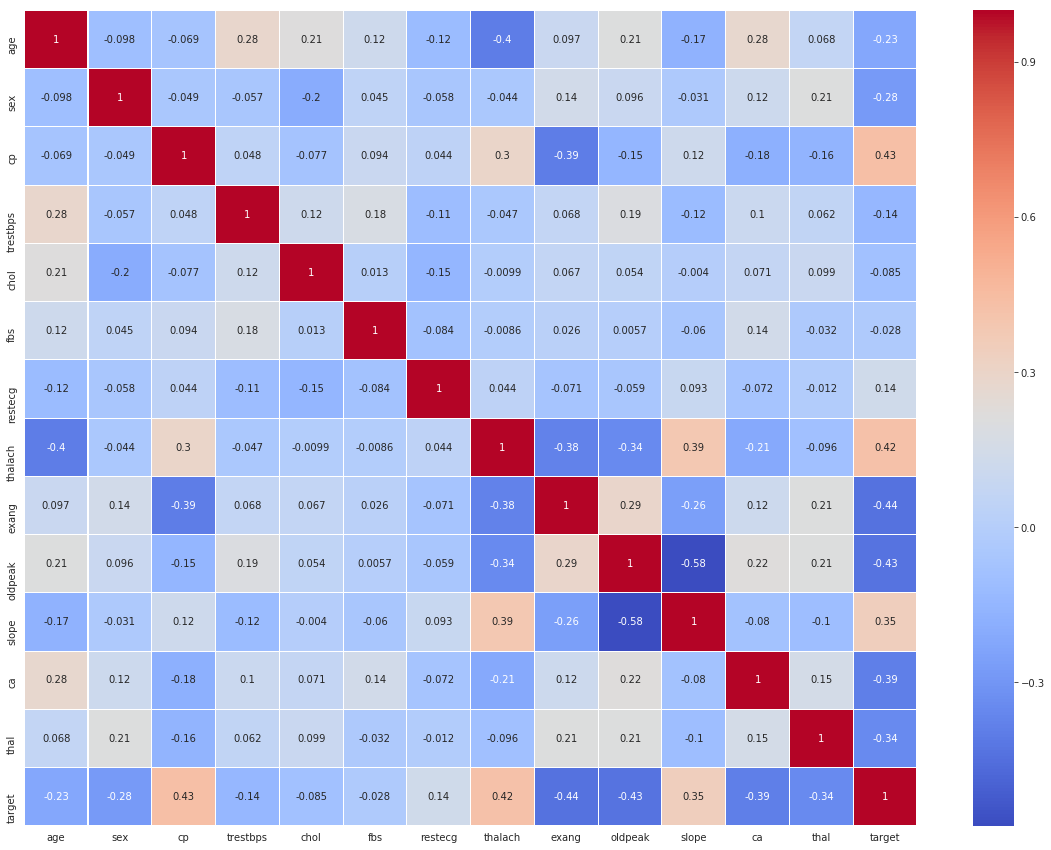

In [0]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm',linewidths=.1,  
            xticklabels=df.columns,
            yticklabels=df.columns,)
plt.show()

There are some variables which have a high correlation (the maximum correlation being between oldpeak, i.e., ST depression induced by exercise relative to rest and slope, i.e., the slope of the peak exercise ST segment).

However, there are no 2 variables which are very highly correlated that we can drop offhand. 

Since there areonly 14 variables, we wil not consider dimensionality reduction using feature selection/PCA.

Now, let us look at the distribution of heart disease with age -


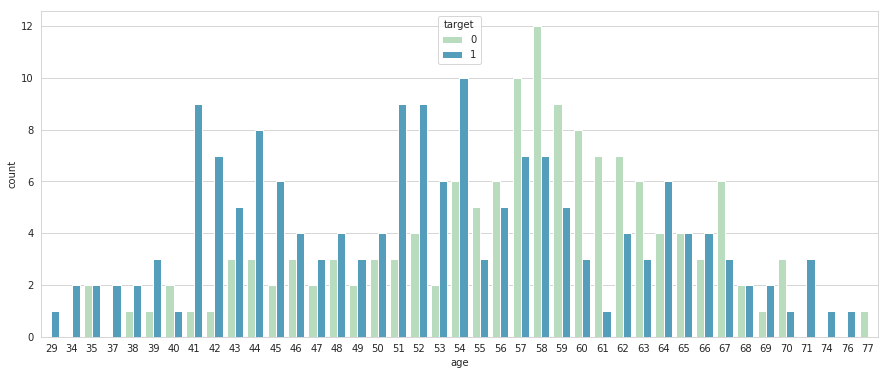

In [0]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'target',palette='GnBu')
plt.show()

Once again, there are no clear patterns visible, as can be seen by a relatively low correlation between target and age.

Below is a scatterplot of resting blood pressure (in mm Hg on admission to the hospital) with age.

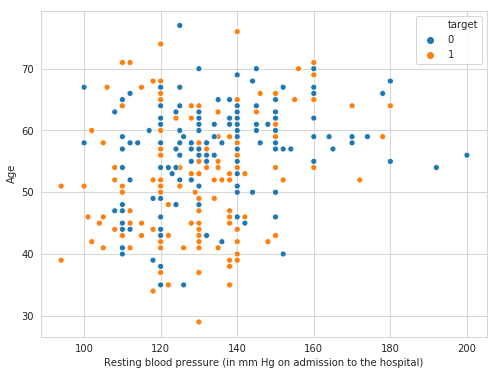

In [0]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='trestbps',y='age',data=df,hue='target')
plt.xlabel("Resting blood pressure (in mm Hg on admission to the hospital)")
plt.ylabel("Age")
plt.show()

Below is a swarmplot (~1D scatterplot) showing the age of the patients based on their sex.

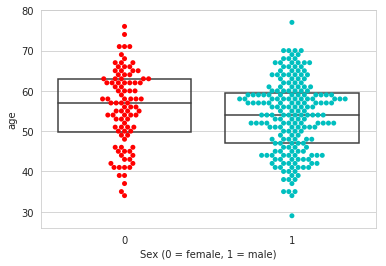

In [0]:
sns.swarmplot(x="sex", y="age", palette=["r", "c"], data=df)
sns.boxplot(x="sex", y="age", data=df, showcaps=False,boxprops={'facecolor':'None'}, showfliers=False,whiskerprops={'linewidth':0})
plt.xlabel("Sex (0 = female, 1 = male)")
plt.show()

##Split into train and test groups


In [0]:
y = df.target.values
x = df.drop(['target'], axis = 1)

Given the wide ranges of the data, it is usually better to normalize each input variable.

In [0]:
import numpy as np
x_normalized = (x - np.min(x)) / (np.max(x) - np.min(x)).values

Splitting into 85% training and 15% testing set - 

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_normalized,y,test_size = 0.15,random_state=0)

In [0]:
print('Shape of x_train',x_train.shape)
print('Shape of x_test',x_test.shape)
print('Shape of y_train',y_train.shape)
print('Shape of y_test',y_test.shape)

Shape of x_train (257, 13)
Shape of x_test (46, 13)
Shape of y_train (257,)
Shape of y_test (46,)


##Predict using classification

###Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
print("Logistic Regression Accuracy {:.2f}%".format(lr.score(x_test,y_test)*100))

Logistic Regression Accuracy 82.61%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
lr_predict = lr.predict(x_test)

###K-NN

Let us try a K-Nearest Neighbours with approach K = 2 to begin with -

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  
knn.fit(x_train, y_train)
prediction_k_equal_2 = knn.predict(x_test)

print("{} NN Accuracy: {:.2f}%".format(2, knn.score(x_test, y_test)*100))

2 NN Accuracy: 84.78%


Clearly, this is working better than logistic regression, in terms of accuracy. 

However, we used K = 2 as a hyperparameter. Instead, it is best to see how the value of accuracy changes with different values of K and choose the one with the best accuracy.

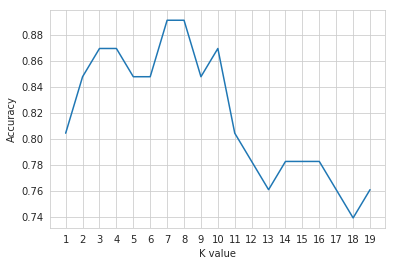

Maximum KNN Accuracy is 89.13% with K = 7


In [0]:
scoreList = []
list1 = range(1,20)
for i in list1:
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test ))
    
plt.plot(list1, scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

max_k = 1 + scoreList.index(max(scoreList)) # since start is from 0
print("Maximum KNN Accuracy is {:.2f}% with K =".format((max(scoreList))*100), max_k)

Another way of arriving at the same conclusion is to use GridSearchCV. 

(This is sort of redundant for our case but GridSearchCV is useful in more complex cases.)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn =KNeighborsClassifier()
params = {'n_neighbors':[i for i in range(1,33,2)]}

knn_model = GridSearchCV(knn,params,cv=10)

In [0]:
knn_model.fit(x_train,y_train)
knn_model.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 7}

According to KNN-score and best parameter estimated by model, we should have 7 neighbors in our estimation, which is consistent with both outcomes.

Let us get the predictions on the test set - 

In [0]:
knn_predict = knn_model.predict(x_test)

### Random Forest

In [0]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf.score(x_test,y_test)*100))

rf_predict = rf.predict(x_test)

Random Forest Algorithm Accuracy Score : 82.61%


# Evaluation on different performance measures

First, let us compare the accuracy values of each of these classification algorithms.

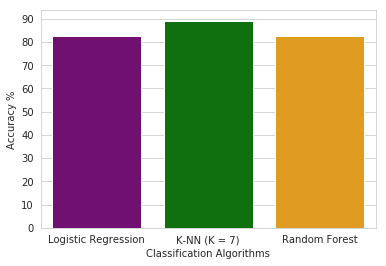

In [0]:
methods = ["Logistic Regression", "K-NN (K = 7)", "Random Forest"]
accuracy = [lr.score(x_test,y_test)*100, knn_model.score(x_test,y_test)*100, rf.score(x_test,y_test)*100]
colors = ["purple", "green", "orange"]

sns.set_style("whitegrid")
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Classification Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()

Accuracy may not be the only evaluation that we are interested in. 

For example, some hospitals might want to have a high recall (to be on the safe side of predicting a heart disease) at the cost of precision. Similarly, insurance companies may want a high precision (for less cost).

As a result, it is better to look at how each of the algorithm performs on these performance measures.

In [0]:
from sklearn.metrics import classification_report
print('Classification Report for Logistic Regression')
print(classification_report(y_test,lr_predict))

print('Classification Report for KNN classification (K = 7)')
print(classification_report(y_test,knn_predict))

print('Classification Report for Random Forest')
print(classification_report(y_test,rf_predict))

Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        23
           1       0.80      0.87      0.83        23

    accuracy                           0.83        46
   macro avg       0.83      0.83      0.83        46
weighted avg       0.83      0.83      0.83        46

Classification Report for KNN classification (K = 7)
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        23
           1       0.88      0.91      0.89        23

    accuracy                           0.89        46
   macro avg       0.89      0.89      0.89        46
weighted avg       0.89      0.89      0.89        46

Classification Report for Random Forest
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        23
           1       0.86      0.78      0.82        23

    accuracy                           0.83

It is easier to visualize these on a graph - 

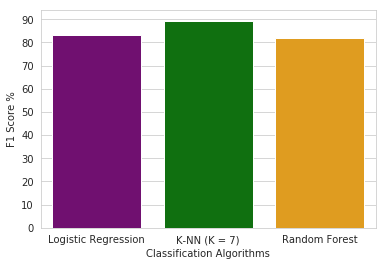

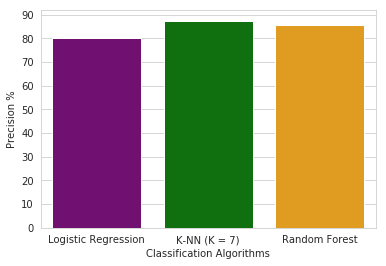

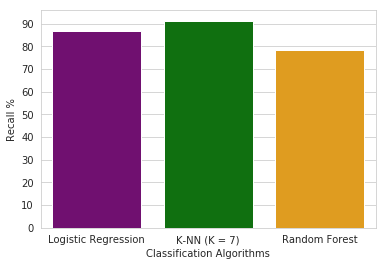

In [0]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

methods = ["Logistic Regression", "K-NN (K = 7)", "Random Forest"]
f1 = [f1_score(y_test,lr_predict)*100, f1_score(y_test,knn_predict)*100, f1_score(y_test,rf_predict)*100]
precision = [precision_score(y_test,lr_predict)*100, precision_score(y_test,knn_predict)*100, precision_score(y_test,rf_predict)*100]
recall = [recall_score(y_test,lr_predict)*100, recall_score(y_test,knn_predict)*100, recall_score(y_test,rf_predict)*100]
colors = ["purple", "green", "orange"]

sns.set_style("whitegrid")
plt.yticks(np.arange(0,100,10))
plt.ylabel("F1 Score %")
plt.xlabel("Classification Algorithms")
sns.barplot(x=methods, y=f1, palette=colors)
plt.show()

sns.set_style("whitegrid")
plt.yticks(np.arange(0,100,10))
plt.ylabel("Precision %")
plt.xlabel("Classification Algorithms")
sns.barplot(x=methods, y=precision, palette=colors)
plt.show()

sns.set_style("whitegrid")
plt.yticks(np.arange(0,100,10))
plt.ylabel("Recall %")
plt.xlabel("Classification Algorithms")
sns.barplot(x=methods, y=recall, palette=colors)
plt.show()

Random Forest algorithm gives a high precision at the cost of recall but is still short of the K-NN algorithm.

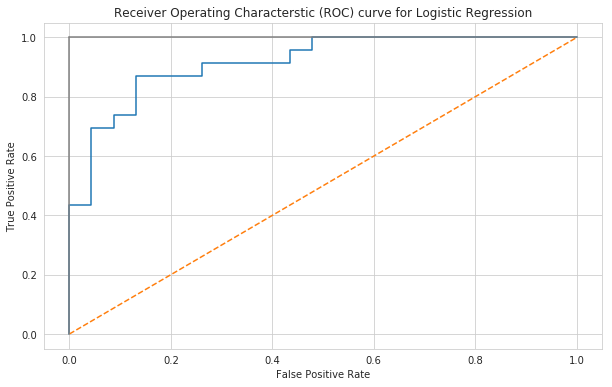

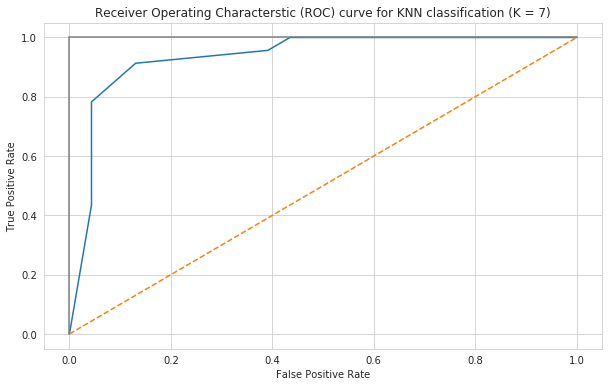

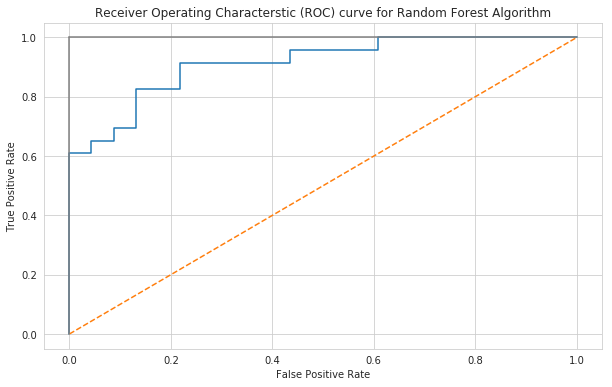

In [0]:
# Receiver Operating Characterstic (ROC) Curve

from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities_knn = model.predict_proba(x_test)[:,1]
y_probabilities_lr = lr.predict_proba(x_test)[:,1]
y_probabilities_rf = rf.predict_proba(x_test)[:,1]

false_positive_rate_lr,true_positive_rate_lr,threshold_lr = roc_curve(y_test,y_probabilities_lr)
false_positive_rate_knn,true_positive_rate_knn,threshold_knn = roc_curve(y_test,y_probabilities_knn)
false_positive_rate_rf,true_positive_rate_rf,threshold_rf = roc_curve(y_test,y_probabilities_rf)

plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characterstic (ROC) curve for Logistic Regression')
plt.plot(false_positive_rate_lr,true_positive_rate_lr)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characterstic (ROC) curve for KNN classification (K = 7)')
plt.plot(false_positive_rate_knn,true_positive_rate_knn)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characterstic (ROC) curve for Random Forest Algorithm')
plt.plot(false_positive_rate_rf,true_positive_rate_rf)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Clearly, KNN outperforms logistic regression and random forests in all performance measures.